Two Kestrels 55 m apart on Blackford Hill, 10 March 2025:
<br>
summit (325440,670636)
<br>
lee of NE wind (325393,670607)
<br>
measuring 10 s averages of wind speed for 1 hour in KestrelCorrelation.csv

Plot correlation between wind speeds for longer averaging times:

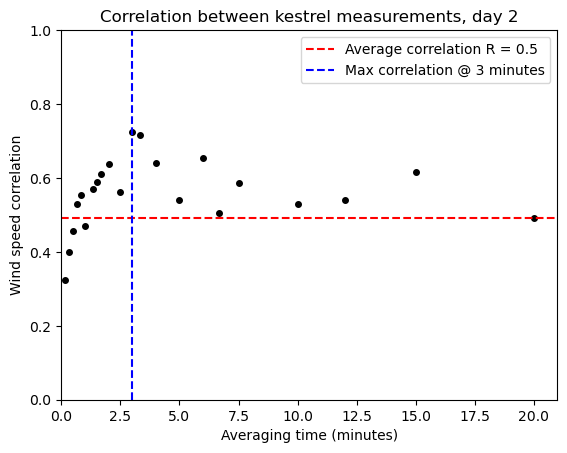

In [5]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import pearsonr
k1 = np.loadtxt('KestrelCorrelation.csv',delimiter=',',skiprows=2,usecols=1)
k2 = np.loadtxt('KestrelCorrelation.csv',delimiter=',',skiprows=2,usecols=2)
divisors = [1,2,3,4,5,6,8,9,10,12,15,18,20,24,30,36,40,45,60,72,90,120]
for div in divisors:
    k1copy = np.copy(k1)
    k2copy = np.copy(k2)
    k1copy = np.average(k1copy.reshape(-1,div),1)
    k2copy = np.average(k2copy.reshape(-1,div),1)
    corr = pearsonr(k1copy,k2copy)[0]
    plt.plot(div/6,corr,'ko', markersize = 4)
plt.xlabel('Averaging time (minutes)')
plt.xlim(0,21)
plt.ylabel('Wind speed correlation')
plt.ylim(0,1)

plt.axhline(np.mean(corr), c='r', linestyle = 'dashed', label = 'Average correlation R = 0.5')
plt.axvline(3, c = 'b', linestyle = 'dashed', label = 'Max correlation @ 3 minutes')
plt.title('Correlation between kestrel measurements, day 2')
plt.legend()
plt.savefig('correlationKestrel.png')